In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
import warnings

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('e:\Python\StudentsPerformance.csv')

In [4]:
X = df.drop(columns=['math score'],axis=1)

In [5]:
Y = df['math score']

In [6]:
num_feature = X.select_dtypes(exclude="object").columns
cat_feature = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
num_feature_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [("OneHotEncoder",oh_transformer,cat_feature),
     ("Standardscaler",num_feature_transformer,num_feature),
    ]
)

In [7]:
num_feature

Index(['reading score', 'writing score'], dtype='object')

In [8]:
cat_feature

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [9]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

In [13]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [18]:
X_train.shape

(800, 19)

In [19]:
X_test.shape

(200, 19)

In [32]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square= r2_score(true,predicted)
    return mae, mse, rmse, r2_square


In [28]:
models = {
    "LinearRegression":LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
}

model_list = []
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train)

    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    

In [41]:
model_train_mae = evaluate_model(Y_train, Y_train_pred)
model_test_mae= evaluate_model(Y_test,Y_test_pred)
model_train_r2 = evaluate_model(Y_train, Y_train_pred)
model_test_r2= evaluate_model(Y_test,Y_test_pred)
model_train_rmse = evaluate_model(Y_train, Y_train_pred)
model_test_rmse = evaluate_model(Y_test,Y_test_pred)


In [42]:
model_train_mae

(1.8231633928571431, 5.264879450077948, 2.2945325123166045, 0.9766469808781212)

In [43]:
model_test_mae

(4.619488095238094, 35.812068051020404, 5.984318511829096, 0.8528301819564015)

In [45]:
lin_model = LinearRegression(fit_intercept=True)
lin_model= lin_model.fit(X_train,Y_train)
y_pred= lin_model.predict(X_test)
score = r2_score(Y_test,y_pred)*100
print("accuracy of th model is %.2f" %score)

accuracy of th model is 87.92


Text(0, 0.5, 'predicted')

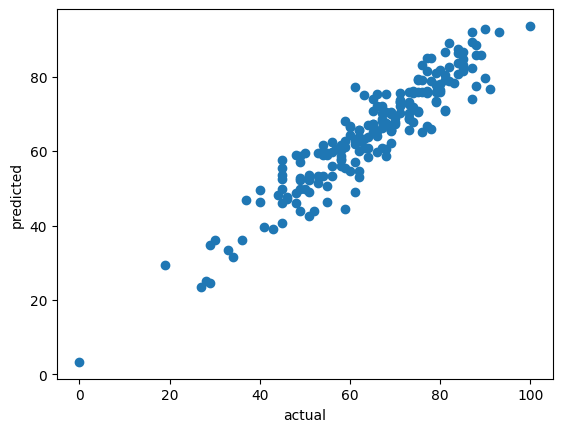

In [46]:
plt.scatter(Y_test,y_pred);
plt.xlabel('actual')
plt.ylabel('predicted')